<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [76]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [51]:
# Package Import
import pandas as pd
import numpy as np

## Randomized projection

In [2]:
# ~1M variables reduce to ~1K variables

The core idea behind random projection is given in the Johnson-Lindenstrauss lemma, which states that if points in a vector space are of sufficiently high dimension, then they may be projected into a suitable lower-dimensional space in a way which approximately preserves the distances between the points.

Reference:

https://www.cs.toronto.edu/~duvenaud/talks/random-kitchen-sinks-tutorial.pdf

http://scikit-learn.org/stable/modules/random_projection.html

In [4]:
from sklearn import random_projection, datasets, metrics

In [7]:
#  if we have 10,000 sample, and the expected error of the distance between points less than 10%, we need 7894 dimensions
random_projection.johnson_lindenstrauss_min_dim(10000, eps=0.1)

7894

In [8]:
#1000 records of data, 0.1 error
random_projection.johnson_lindenstrauss_min_dim(1000, eps=0.1)

5920

## Gaussian Randomized projection

In [10]:
X, Y = datasets.make_blobs(n_samples=1000, n_features=100000, centers=2, random_state=1)

In [13]:
X.shape

(1000, 100000)

In [16]:
rp_grp = random_projection.GaussianRandomProjection?

In [19]:
rp_grp = random_projection.GaussianRandomProjection()

In [20]:
%%time 
Xnew = rp_grp.fit_transform(X)

CPU times: user 48.5 s, sys: 4.17 s, total: 52.7 s
Wall time: 29.1 s


In [21]:
rp_grp.components_.shape

(5920, 100000)

In [45]:
Xnew.shape 
# X dimension reduce to 5920

(1000, 5920)

(array([  2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          1.00000000e+01,   1.20000000e+01,   2.00000000e+01,
          4.10000000e+01,   6.20000000e+01,   1.18000000e+02,
          2.41000000e+02,   4.09000000e+02,   7.45000000e+02,
          1.33400000e+03,   2.28200000e+03,   3.92300000e+03,
          6.54500000e+03,   1.08980000e+04,   1.77110000e+04,
          2.82130000e+04,   4.41400000e+04,   6.87450000e+04,
          1.05451000e+05,   1.59709000e+05,   2.36302000e+05,
          3.44821000e+05,   4.95822000e+05,   6.99868000e+05,
          9.78818000e+05,   1.34137900e+06,   1.81104300e+06,
          2.41258400e+06,   3.15974600e+06,   4.07773700e+06,
          5.17741600e+06,   6.47630800e+06,   7.98103200e+06,
          9.68499500e+06,   1.15598140e+07,   1.35870790e+07,
          1.57362450e+07,   1.79427950e+07,   2.01401150e+07,
          2.22619030e+07,   2.42289660e+07,   2.59674910e+07,
          2.74089820e+07,   2.84857560e+07,   2.91357470e+07,
        

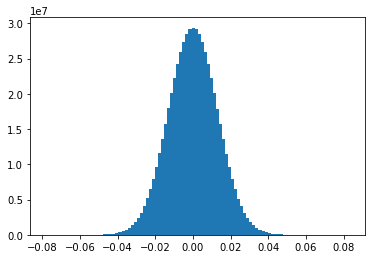

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(rp_grp.components_.ravel(), bins=100)

In [ ]:
# Calculate the distance betweem points
# then calculate the errors

In [28]:
dist_1 = metrics.pairwise_distances(X) # Original dataset
dist_2 = metrics.pairwise_distances(Xnew) # Dimension Reduced dataset
dist_error = np.abs(dist_1 - dist_2) # error

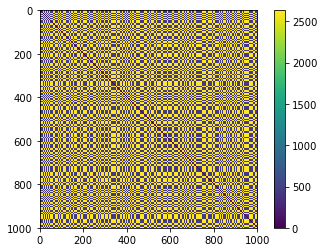

In [31]:
# Plot the original distance between two points
plt.imshow(dist_1)
plt.colorbar()

The scale of distance between two points in original dataset is from 0 to 2500. 

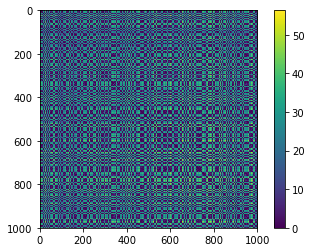

In [30]:
plt.imshow(dist_error)
plt.colorbar()

The scale of distance error between original dataset and dimension reduced dataset is from 0 to 60. 

In [64]:
dist_error.shape

(1000, 1000)

In [38]:
dist_1[dist_1 < 0.01] = 0.01
dist_ratio = dist_error / dist_1

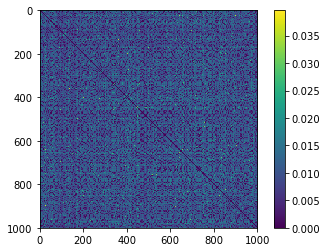

In [39]:
plt.imshow(dist_ratio)
plt.colorbar()

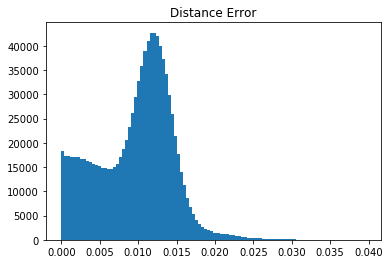

In [43]:
plt.hist(dist_ratio.ravel(),bins = 100)
plt.title('Distance Error')

From the histogram we can see most error less than 2%.

Now, if we want to reduce the dimension to 2000 variables

In [47]:
# set n_conmponents = 2000
rp_srp = random_projection.SparseRandomProjection(n_components=2000) 
# transform the data
Xnew1 = rp_srp.fit_transform(X)
Xnew1.shape

(1000, 2000)

The X reduced to 2000 dimensions instead of 5928, we expect higher distance error than reduced X with 5920 dimensions 

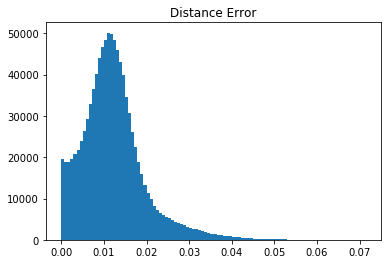

In [48]:
# calculate the distance
dist_1 = metrics.pairwise_distances(X)
dist_3 = metrics.pairwise_distances(Xnew1)
dist_error = np.abs(dist_1 - dist_3)
dist_1[dist_1 < 0.01] = 0.01
dist_ratio = dist_error / dist_1

plt.hist(dist_ratio.ravel(), bins=100)
plt.title('Distance Error')
plt.show()

Now we can see the error increased, most error less than 4% and some increased to 7%. 

When we reduced the dimension, the more dimensions reduced, the higher of distance error generated.


# Principle component analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components (or sometimes, principal modes of variation). 

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

#### Key
1. Orthogonal transformation
2. Linearly uncorrelated components

#### Object:

After centralization, find the transformation matrix w, such that
1. w(i) is indipendect_from w{j}
2. after transformation, variance is maximized

#### How PCA works? 
Step 1. data are normalized by mean

Step 2. Covarience matrix is calculated

Step 3. Eig value & vectors are extracted

Step 4. Sort by the eig values

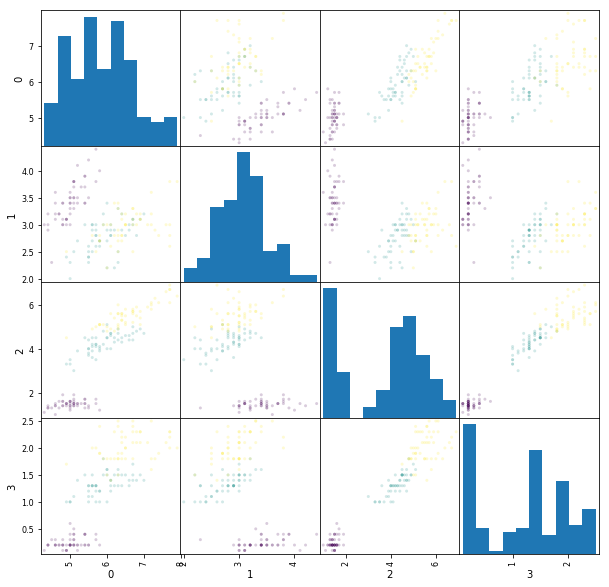

In [54]:
# visualize data through scatterplot 
from pandas.tools.plotting import scatter_matrix

data = datasets.load_iris()
X = data.data
Y = data.target

_ = pd.plotting.scatter_matrix(pd.DataFrame(X), alpha=0.2, figsize=(10, 10), diagonal='hist', c=Y)

### Linear PCA

In [55]:
X.shape

(150, 4)

In [56]:
from sklearn import decomposition

In [57]:
d_pca = decomposition.PCA(n_components=2) # reduce 4 dimension to 2 dimension

In [58]:
Xnew = d_pca.fit_transform(X)

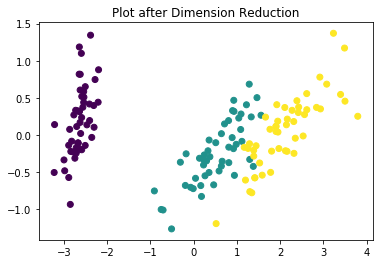

In [60]:
plt.scatter(Xnew[:,0], Xnew[:,1], c=Y)
plt.title('Plot after Dimension Reduction')

#### Explained Variance

In [65]:
d_pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [66]:
d_pca.explained_variance_

array([ 4.19667516,  0.24062861])

In [67]:
d_pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

#### SVD approach

In [72]:
X1 = X - np.mean(X, axis=0)

# SVD over matrix 
U, S, V = np.linalg.svd(X1, full_matrices=False)

# directly get explained varience 
explained_variance_ = (S ** 2) / X1.shape[0]

# compare with PCA's eighen vector

In [73]:
explained_variance_

array([ 4.19667516,  0.24062861,  0.07800042,  0.02352514])

In [75]:
# Recover the first most important components
m = 1

U1 = U[:, :m]
V1 = V[:m, :]
S1 = S[:m]
print(U1.shape, S1.shape, V1.shape)

(150, 1) (1,) (1, 4)


In [81]:
V # equals d_pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [ ]:
# Excercise: try run PCA for this data, see how it looks like: the transformed result & explained variance ratio
# changing the d, see how it (varience explained) looks like
N = 100
d = 10.
x = np.random.normal(size=N).reshape([N,1])
y = (np.random.normal(size=N) * d).reshape([N,1])
data = np.hstack([x,y])

### Randomized PCA

Principal component analysis (PCA) using randomized SVD
Linear dimensionality reduction using approximated Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.

References:

http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.decomposition.RandomizedPCA.html
https://web.stanford.edu/group/mmds/slides2010/Martinsson.pdf

ftp://ftp.math.ucla.edu/pub/camreport/cam08-60.pdf

### Sparse PCA

Sparse principal component analysis (sparse PCA) is a specialised technique used in statistical analysis and, in particular, in the analysis of multivariate data sets. It extends the classic method of principal component analysis (PCA) for the reduction of dimensionality of data by adding sparsity constraint on the input variables.

Ordinary principal component analysis (PCA) uses a vector space transform to reduce multidimensional data sets to lower dimensions. It finds linear combinations of input variables, and transforms them into new variables (called principal components) that correspond to directions of maximal variance in the data. The number of new variables created by these linear combinations is usually much lower than the number of input variables in the original dataset, while still explaining most of the variance present in the data.

A particular disadvantage of ordinary PCA is that the principal components are usually linear combinations of all input variables. Sparse PCA overcomes this disadvantage by finding linear combinations that contain just a few input variables.



In [84]:
decomposition.SparsePCA?

References:
    
https://en.wikipedia.org/wiki/Sparse_PCA

https://www.turing-gateway.cam.ac.uk/sites/default/files/asset/doc/1705/MG_CCworkshop5.pdf

### Incremental PCA

What if data is huge!

Batch process

Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

References:
    
http://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html

### Kernal PCA

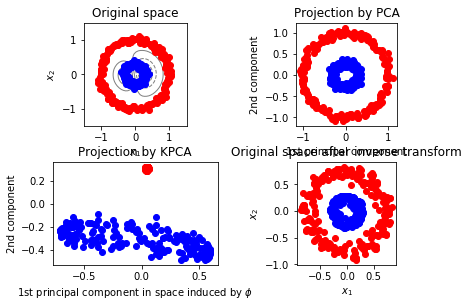

In [86]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=400, factor=.3, noise=.05)

kpca = decomposition.KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

## Manifold learning

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high.

References:
    
http://scikit-learn.org/stable/modules/manifold.html
    
https://prateekvjoshi.com/2014/06/21/what-is-manifold-learning/
    
https://www.cs.cmu.edu/~efros/courses/AP06/presentations/ThompsonDimensionalityReduction.pdf
    
https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

### MDS - Multidimensional Scaling

Principle: optimize "stress" along with configuration search

Require n_components provided

Optional: dissimilarity metrics

In [86]:
from sklearn import datasets
data = datasets.make_blobs(n_samples=1000, n_features=10, centers=3, random_state=0)
data[0].shape
# plt.plot(data[0], data[1], '.', ms=10);

(1000, 10)

In [87]:
from sklearn import manifold

In [88]:
m_mds = manifold.MDS()

In [89]:
Xnew = m_mds.fit_transform(data[0])

In [90]:
m_mds.dissimilarity_matrix_.shape # distance between two points

(1000, 1000)

In [91]:
m_mds.embedding_.shape

(1000, 2)

In [92]:
m_mds.stress_

799481.10546105204

### IsoMap - Isometric Mapping

Principle: use minimum path search to get "local" connection distance, then MDS or kernal PCA

nearest neighbour + minimum distance calculation

Require n_neighbors, n_components

Optional: dissimilarity metrics

1. Construct neighborhood graph ['auto'|'brute'|'kd_tree'|'ball_tree']
2. Compute shortest paths ['auto'|'FW'|'D']
3. Construct d-dimensional embedding

References:
    
http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf

In [99]:
X, Y = datasets.make_swiss_roll(1000, random_state=1)
from mpl_toolkits.mplot3d import Axes3D

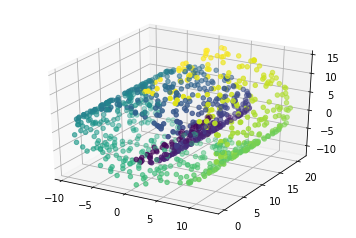

In [100]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)

In [101]:
# compare PCA and IsoMap and MDS
m_mds = manifold.MDS(n_components=2)
Xnew_mds = m_mds.fit_transform(X)

m_iso = manifold.Isomap(n_components=2)
Xnew_iso = m_iso.fit_transform(X)

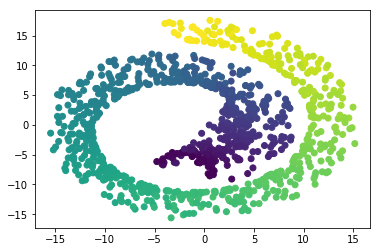

In [103]:
plt.scatter(Xnew_mds[:,0], Xnew_mds[:,1], c=Y)

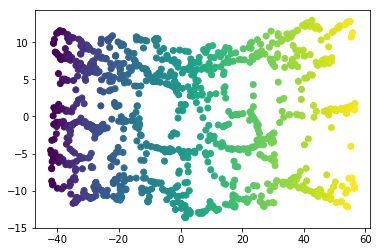

In [104]:
plt.scatter(Xnew_iso[:,0], Xnew_iso[:,1], c=Y)

### Local linear embedding

In [ ]:
# Nearest neighbour search
# Local distance construct local PCA

In [ ]:
# changing the n_neighbors
%%time
mi = manifold.LocallyLinearEmbedding(n_neighbors=999)
Xnew = mi.fit_transform(X)
plt.scatter(Xnew[:,0], Xnew[:,1], c=Y)

### t-SNE

In [ ]:
# changing the n_neighbors
# based on retain the probability between each pair